In [3]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
delta0 = 1 # ~ 1GHz detuning    
omega0 = 0.1 # for some reference
gamma0 = 0.05 # 1MHz decay rate

delta1 = 0.6 # ~ 1GHz detuning    
omega1 = 0.1 # for some reference
gamma1 = 0.03 # 1MHz decay rate


#Considering the case of gamma << delta; weak dissipation. omega set to similar units as delta0 (likely GHz)

gamma = gamma1 + gamma0
delta = delta1 + delta0


# To get pure rabi oscillations:
# gamma1 = 0
# gamma2 = 0
# gamma = gamma1 + gamma0

c0 = delta0 - (delta0 * omega0**2)/(4*delta0**2 + gamma**2) 
c1 = delta1 - (delta1 * omega1**2)/(4*delta1**2 + gamma**2) 
c2 = (delta0 + delta1 )* (omega0 * omega1)/(8*(delta0 - 1j * gamma/2)*(delta1 + 1j * gamma/2))

In [5]:
Hg = -delta0 * qt.fock_dm(2,0) - delta1* qt.fock_dm(2,1)

Heff = c0* qt.fock_dm(2,0) + c1*qt.fock_dm(2,1) + c2*qt.basis(2,0) * qt.basis(2,1).dag() + c2.conjugate()*qt.basis(2,1) * qt.basis(2,0).dag() + Hg

Leff0 = (np.sqrt(gamma0) * omega0)/(2*delta0 + 1j*gamma) * qt.fock_dm(2,0) +  (np.sqrt(gamma0) * omega1)/(2*delta1 - 1j*gamma) *  qt.basis(2,0) * qt.basis(2,1).dag() 
Leff1 =  (np.sqrt(gamma1) * omega0)/(2*delta0 - 1j*gamma) *  qt.basis(2,1) * qt.basis(2,0).dag() + (np.sqrt(gamma1) * omega1)/(2*delta1 + 1j*gamma) * qt.fock_dm(2,1) 

c_ops = [Leff0, Leff1] #collapse operators, given as input to Master eqn solver

In [6]:
rho0 = qt.fock_dm(2, 0)  # Initialized to |0><0|

t_list = np.linspace(0, 3e4, 10**4) * 1/delta  # as per paper

# Solve the master equation
result = qt.mesolve(Heff, rho0, t_list, c_ops, [])


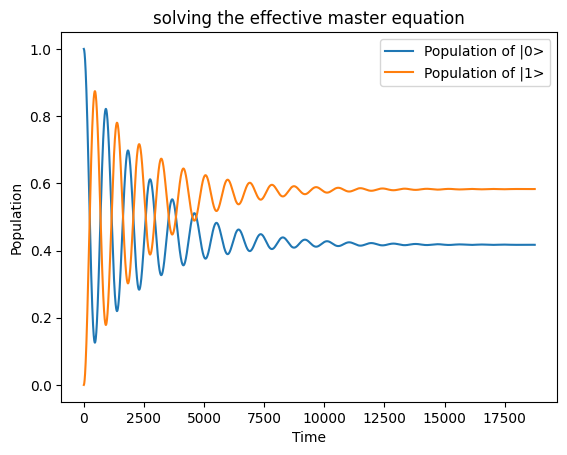

In [7]:
pop0 = qt.expect(qt.fock_dm(2, 0), result.states)  # Population of |0><0|
pop1 = qt.expect(qt.fock_dm(2, 1), result.states)  # Population of |1><1|

plt.plot(t_list, pop0, label="Population of |0>")
plt.plot(t_list, pop1, label="Population of |1>")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("solving the effective master equation")
plt.show()

### Now trying to solve for a three-level system directly and reproducing population dynamics: 

In [8]:
L0 = np.sqrt(gamma0) * qt.basis(3,0) * qt.basis(3,2).dag()   
Hg3 = -delta0 * qt.fock_dm(3,0) - delta1* qt.fock_dm(3,1)       #  a |0><0| +  b |1><1|, set energy of |e> = 0 

Htot = (
Hg3 + 
omega0/2* qt.basis(3,0) * qt.basis(3,2).dag() + omega0/2* qt.basis(3,2) * qt.basis(3,0).dag() +   # |0><e| + c.c
omega1/2* qt.basis(3,1) * qt.basis(3,2).dag() + omega1/2* qt.basis(3,2) * qt.basis(3,1).dag()     # |0><e| + c.c
)   


# defining collapse operators

L0 = np.sqrt(gamma0) * qt.basis(3,0) * qt.basis(3,2).dag()     # |0><e|
L1 = np.sqrt(gamma1) * qt.basis(3,1) * qt.basis(3,2).dag()     # |1><e|

c_ops = [L0, L1]

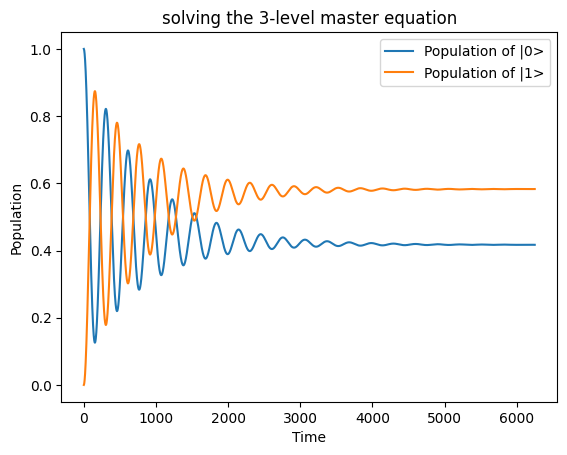

In [9]:
# rho0 = 0.5*(qt.fock_dm(3, 0) + qt.fock_dm(3, 1)) # Initialized to |0><

rho0 = qt.fock_dm(3,0) #same initial state

t_list = np.linspace(0, 1e4, 10**4) * 1/delta  # as per paper

# Solve the master equation
result = qt.mesolve(Htot, rho0, t_list, c_ops, [])


pop0_tot = qt.expect(qt.fock_dm(3, 0), result.states)  # Population of |0><0|
pop1_tot = qt.expect(qt.fock_dm(3, 1), result.states)  # Population of |1><1|
pop2_tot = qt.expect(qt.fock_dm(3, 2), result.states)  # Population of |1><1|

plt.plot(t_list, pop0, label="Population of |0>")
plt.plot(t_list, pop1, label="Population of |1>")
# plt.plot(t_list, pop2, label="Population of |2>")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("solving the 3-level master equation")
plt.show()

## Results needed for upcoming week (Feb 1-6 2025):

## 1. Derive the effective Hamiltonian expressions (from scratch) - Goal is to understand what assumptions/approximations hold at what parameter regimes
## 2. Test this out for 2LS and 3LS hamiltonians as well as their effective derivations through simulation - control parameters to view and interpret results also

## 3. Incorporate motional DoF (ref Hood's paper) to observe more interesting dynamics (?)